## Data Analysis_6

### Configuration

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib
from IPython.display import set_matplotlib_formats

matplotlib.rc('font', family='NanumGothic')

matplotlib.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

### Load Dataset

In [4]:
user_info = pd.read_csv("data/zigzag/user_info.csv")

print(user_info.shape)

user_info.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [5]:
shop_info = pd.read_csv("data/zigzag/shop_info.csv")

print(shop_info.shape)

shop_info.head()

(200, 5)


,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [6]:
goods_info = pd.read_csv("data/zigzag/goods_info.csv")

print(goods_info.shape)

goods_info.head()

(7188, 8)


,goods_id,timestamp,shop_id,category,price,image_type,image_width,image_height
0,1,2017-01-03 17:15:47.095,153,상의,17000,jpg,500,500
1,2,2017-01-05 19:00:05.126,11,악세사리,268000,gif,270,360
2,3,2017-01-16 16:34:12.717,86,란제리&파자마,22000,jpg,500,666
3,4,2017-01-18 18:35:54.200,53,란제리&파자마,24800,gif,280,380
4,5,2017-01-21 17:09:08.954,60,스커트,29000,jpg,330,235


In [7]:
goods_info["timestamp"] = pd.to_datetime(goods_info["timestamp"])

goods_info["timestamp(year)"] = goods_info["timestamp"].dt.year
goods_info["timestamp(month)"] = goods_info["timestamp"].dt.month
goods_info["timestamp(day)"] = goods_info["timestamp"].dt.day
goods_info["timestamp(hour)"] = goods_info["timestamp"].dt.hour
goods_info["timestamp(minute)"] = goods_info["timestamp"].dt.minute
goods_info["timestamp(second)"] = goods_info["timestamp"].dt.second
goods_info["timestamp(dayofweek)"] = goods_info["timestamp"].dt.weekday_name

goods_info.head()

,goods_id,timestamp,shop_id,category,price,image_type,image_width,image_height,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek)
0,1,2017-01-03 17:15:47.095,153,상의,17000,jpg,500,500,2017,1,3,17,15,47,Tuesday
1,2,2017-01-05 19:00:05.126,11,악세사리,268000,gif,270,360,2017,1,5,19,0,5,Thursday
2,3,2017-01-16 16:34:12.717,86,란제리&파자마,22000,jpg,500,666,2017,1,16,16,34,12,Monday
3,4,2017-01-18 18:35:54.200,53,란제리&파자마,24800,gif,280,380,2017,1,18,18,35,54,Wednesday
4,5,2017-01-21 17:09:08.954,60,스커트,29000,jpg,330,235,2017,1,21,17,9,8,Saturday


In [8]:
order_info = pd.read_csv("data/zigzag/order_info.csv")

print(order_info.shape)

order_info.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [9]:
order_info["timestamp"] = pd.to_datetime(order_info["timestamp"])

order_info["timestamp(year)"] = order_info["timestamp"].dt.year
order_info["timestamp(month)"] = order_info["timestamp"].dt.month
order_info["timestamp(day)"] = order_info["timestamp"].dt.day
order_info["timestamp(hour)"] = order_info["timestamp"].dt.hour
order_info["timestamp(minute)"] = order_info["timestamp"].dt.minute
order_info["timestamp(second)"] = order_info["timestamp"].dt.second
order_info["timestamp(dayofweek)"] = order_info["timestamp"].dt.weekday_name

order_info.head()

,timestamp,user_id,goods_id,shop_id,price,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek)
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,2018,6,11,0,0,43,Monday
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,2018,6,11,0,2,33,Monday
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,2018,6,11,0,4,6,Monday
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,2018,6,11,0,4,17,Monday
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,2018,6,11,0,5,26,Monday


In [10]:
user_event_logs = pd.read_csv("data/zigzag/user_event_logs.csv")

print(user_event_logs.shape)

user_event_logs.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


In [11]:
user_event_logs["timestamp"] = pd.to_datetime(user_event_logs["timestamp"])

user_event_logs["timestamp(year)"] = user_event_logs["timestamp"].dt.year
user_event_logs["timestamp(month)"] = user_event_logs["timestamp"].dt.month
user_event_logs["timestamp(day)"] = user_event_logs["timestamp"].dt.day
user_event_logs["timestamp(hour)"] = user_event_logs["timestamp"].dt.hour
user_event_logs["timestamp(minute)"] = user_event_logs["timestamp"].dt.minute
user_event_logs["timestamp(second)"] = user_event_logs["timestamp"].dt.second
user_event_logs["timestamp(dayofweek)"] = user_event_logs["timestamp"].dt.weekday_name


user_event_logs.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek)
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN,2018,6,11,0,0,0,Monday
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN,2018,6,11,0,0,0,Monday
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN,2018,6,11,0,0,0,Monday
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN,2018,6,11,0,0,1,Monday
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN,2018,6,11,0,0,1,Monday


### 1. 사용자의 상세 정보 출력

In [12]:
user_info.head()

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [13]:
user_info[user_info["user_id"] == "--PYPMX8QWg0ioT5zfORmU-S5Lln0lot"]

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41


In [14]:
def find_user(user_id, finish = 'today'):
    profile = user_info[user_info["user_id"] == user_id]
    orders = order_info[order_info["user_id"] == user_id]
    logs = user_event_logs[user_event_logs["user_id"] == user_id]
    return profile, orders, logs

In [15]:
find_user("gni976f7oJAqbJCoOd9N7pupYq43qujw", finish = 'today')

(                               user_id   os  age
 7006  gni976f7oJAqbJCoOd9N7pupYq43qujw  iOS   33,
                   timestamp                           user_id  goods_id  \
 842 2018-06-11 23:22:14.971  gni976f7oJAqbJCoOd9N7pupYq43qujw      2129   
 
      shop_id  price  timestamp(year)  timestamp(month)  timestamp(day)  \
 842       32  24800             2018                 6              11   
 
      timestamp(hour)  timestamp(minute)  timestamp(second)  \
 842               23                 22                 14   
 
     timestamp(dayofweek)  
 842               Monday  ,
                      timestamp                           user_id event_origin  \
 31026  2018-06-11 10:47:09.669  gni976f7oJAqbJCoOd9N7pupYq43qujw     my_goods   
 54129  2018-06-11 16:26:59.993  gni976f7oJAqbJCoOd9N7pupYq43qujw     my_goods   
 54135  2018-06-11 16:27:01.604  gni976f7oJAqbJCoOd9N7pupYq43qujw     my_goods   
 54145  2018-06-11 16:27:08.223  gni976f7oJAqbJCoOd9N7pupYq43qujw     my_goods  

In [16]:
# 특정사용자 찾기
user_id = "gni976f7oJAqbJCoOd9N7pupYq43qujw"

profile, orders, logs = find_user(user_id, finish = 'today')

In [17]:
profile

,user_id,os,age
7006,gni976f7oJAqbJCoOd9N7pupYq43qujw,iOS,33


In [18]:
orders

,timestamp,user_id,goods_id,shop_id,price,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek)
842,2018-06-11 23:22:14.971,gni976f7oJAqbJCoOd9N7pupYq43qujw,2129,32,24800,2018,6,11,23,22,14,Monday


In [19]:
logs.head()

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek)
31026,2018-06-11 10:47:09.669,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,app_page_view,NaN,NaN,2018,6,11,10,47,9,Monday
54129,2018-06-11 16:26:59.993,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,enter_browser,4426.0,38.0,2018,6,11,16,26,59,Monday
54135,2018-06-11 16:27:01.604,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,app_page_view,NaN,NaN,2018,6,11,16,27,1,Monday
54145,2018-06-11 16:27:08.223,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,enter_browser,2129.0,32.0,2018,6,11,16,27,8,Monday
54179,2018-06-11 16:27:30.587,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,app_page_view,NaN,NaN,2018,6,11,16,27,30,Monday


In [20]:
# 특정시간 이전까지만 가져오기
finish = pd.to_datetime("2018-06-11 18:00:00")

# 이렇게 하면 오후 6시 이전의 모든 구매 정보, 서비스 이용 내역은 배제하고 출력합니다.
profile, orders, logs = find_user(user_id, finish = finish)

In [21]:
profile

,user_id,os,age
7006,gni976f7oJAqbJCoOd9N7pupYq43qujw,iOS,33


In [22]:
orders

,timestamp,user_id,goods_id,shop_id,price,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek)
842,2018-06-11 23:22:14.971,gni976f7oJAqbJCoOd9N7pupYq43qujw,2129,32,24800,2018,6,11,23,22,14,Monday


In [23]:
logs

,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek)
31026,2018-06-11 10:47:09.669,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,app_page_view,NaN,NaN,2018,6,11,10,47,9,Monday
54129,2018-06-11 16:26:59.993,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,enter_browser,4426.0,38.0,2018,6,11,16,26,59,Monday
54135,2018-06-11 16:27:01.604,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,app_page_view,NaN,NaN,2018,6,11,16,27,1,Monday
54145,2018-06-11 16:27:08.223,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,enter_browser,2129.0,32.0,2018,6,11,16,27,8,Monday
54179,2018-06-11 16:27:30.587,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,app_page_view,NaN,NaN,2018,6,11,16,27,30,Monday
54311,2018-06-11 16:29:27.990,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,enter_browser,2129.0,32.0,2018,6,11,16,29,27,Monday
79032,2018-06-11 21:03:51.011,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,app_page_view,NaN,NaN,2018,6,11,21,3,51,Monday
83718,2018-06-11 21:38:25.108,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,enter_browser,2129.0,32.0,2018,6,11,21,38,25,Monday
85694,2018-06-11 21:52:52.574,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,app_page_view,NaN,NaN,2018,6,11,21,52,52,Monday
85699,2018-06-11 21:52:55.766,gni976f7oJAqbJCoOd9N7pupYq43qujw,my_goods,enter_browser,2129.0,32.0,2018,6,11,21,52,55,Monday


In [24]:
# user_id 를 이용하여 하나로 합쳐주기
order_user_info = pd.merge(order_info, user_info, on = 'user_id', how='inner')

print(order_user_info.shape)

order_user_info.head()

(867, 14)


,timestamp,user_id,goods_id,shop_id,price,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek),os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,2018,6,11,0,0,43,Monday,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,2018,6,11,0,2,33,Monday,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,2018,6,11,0,4,6,Monday,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,2018,6,11,0,4,17,Monday,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,2018,6,11,0,5,26,Monday,And,17


In [25]:
# 나이가 -1 인 값을 찾기
order_user_info[order_user_info["age"] == -1]

,timestamp,user_id,goods_id,shop_id,price,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek),os,age
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,2018,6,11,0,4,6,Monday,And,-1
57,2018-06-11 00:42:22.451,MxzVx01SvanhSaaSVROjaPgPZgF-R8b7,6061,14,54000,2018,6,11,0,42,22,Monday,iOS,-1
63,2018-06-11 00:46:43.845,9kBsnxkIY5hV-222s00gw6e3UXqC-L6R,2641,94,31900,2018,6,11,0,46,43,Monday,iOS,-1
134,2018-06-11 02:23:02.453,ufMNuHl9t23qKlMWEJE9G5E_4OjSYFnO,6367,194,19430,2018,6,11,2,23,2,Monday,iOS,-1
151,2018-06-11 02:42:41.540,Q3b6sc9u8wQp9D8N8QP5sKW5zAY_aM2E,4944,167,31350,2018,6,11,2,42,41,Monday,iOS,-1
160,2018-06-11 03:07:08.628,RhkbkdW0nD2gQ5TQxdD3BBRnrxDKG5SR,2250,93,18000,2018,6,11,3,7,8,Monday,iOS,-1
161,2018-06-11 03:08:35.512,UylP44AkHGty9mTL5in0hAgSgcLaHl5M,2974,121,38000,2018,6,11,3,8,35,Monday,iOS,-1
166,2018-06-11 03:17:28.258,HJNmMLa3bmz8VE0Ci1_KIpiTQ6vGixRV,2452,18,46500,2018,6,11,3,17,28,Monday,iOS,-1
170,2018-06-11 03:30:12.346,UXr4iQTAUER1ITIrM5vyhNOyjbqWogds,5972,113,31500,2018,6,11,3,30,12,Monday,iOS,-1
182,2018-06-11 04:03:39.156,lm0nmeVGh6gZvxf2OVlWyPu_lz-zsjJk,2862,60,28900,2018,6,11,4,3,39,Monday,And,-1


In [26]:
# 시간별 거래량 pivot table
table = pd.pivot_table(order_user_info, values = 'price', index = 'timestamp(hour)', aggfunc = ['sum'])

table

,sum
,price
timestamp(hour),
0,1479210
1,990300
2,787830
3,467650
4,304800
5,47100
6,192400
7,430300


In [27]:
# 나이대 설정
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age / 10 >= 4.5:
        return "45+"
    elif age / 10 >= 4:
        return "40"
    elif age / 10 >= 3:
        return "30"
    elif age / 10 >= 2:
        return "20"
    else:
        return "10"

In [28]:
make_generation(23)

'20'

In [29]:
age_list = ['10', '20', '30', '40', '45+']
for i in age_list:
    order_user_info["age_0"] = order_user_info['age'].map(make_generation)
order_user_info.head()

,timestamp,user_id,goods_id,shop_id,price,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek),os,age,age_0
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,2018,6,11,0,0,43,Monday,iOS,39,30
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,2018,6,11,0,2,33,Monday,And,17,10
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,2018,6,11,0,4,6,Monday,And,-1,미입력
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,2018,6,11,0,4,17,Monday,And,34,30
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,2018,6,11,0,5,26,Monday,And,17,10


In [30]:
# 나이 -1 정리
order_user_info_clear_age = order_user_info[order_user_info["age"] != -1]

order_user_info_clear_age

,timestamp,user_id,goods_id,shop_id,price,timestamp(year),timestamp(month),timestamp(day),timestamp(hour),timestamp(minute),timestamp(second),timestamp(dayofweek),os,age,age_0
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,2018,6,11,0,0,43,Monday,iOS,39,30
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,2018,6,11,0,2,33,Monday,And,17,10
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,2018,6,11,0,4,17,Monday,And,34,30
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,2018,6,11,0,5,26,Monday,And,17,10
5,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,55,22,11200,2018,6,11,0,5,35,Monday,iOS,21,20
6,2018-06-11 00:06:14.314,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,2451,22,19800,2018,6,11,0,6,14,Monday,iOS,22,20
7,2018-06-11 00:08:39.716,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,4278,60,23500,2018,6,11,0,8,39,Monday,iOS,24,20
8,2018-06-11 01:11:36.225,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,2384,170,25000,2018,6,11,1,11,36,Monday,iOS,24,20
9,2018-06-11 00:11:30.954,Evz6xmsye1BP7i33rr_RAjwBRZ_AOsTZ,686,22,12900,2018,6,11,0,11,30,Monday,And,27,20
10,2018-06-11 00:12:12.469,_t38UxRGHDKAsgc7nJhxz0e7q3pIj-RD,4521,19,26500,2018,6,11,0,12,12,Monday,iOS,44,40


C:\Users\jjcor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


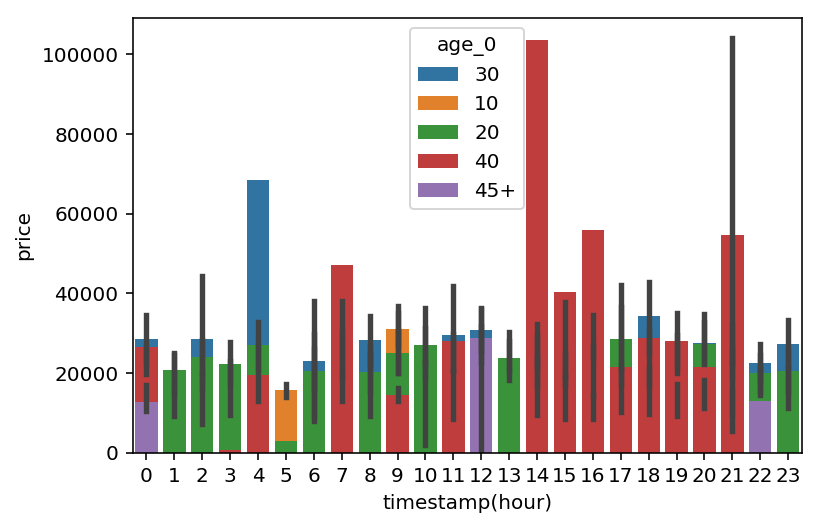

In [31]:
sns.barplot(x='timestamp(hour)', y='price', hue='age_0', data=order_user_info_clear_age, dodge=False)